CaffeNet found.


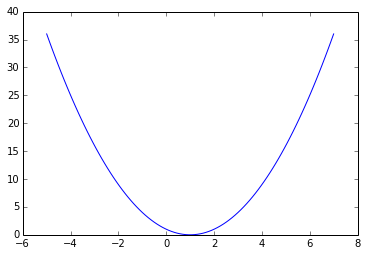

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x * x - 2 * x + 1
x = np.linspace(-5,7,100)
y = f(x)
plt.plot(x, y)
caffe_root='/home/jaychou/code/new_caffe/caffe-master/'
import sys
import os
sys.path.insert(0,caffe_root+'python')
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
import caffe
import os
if os.path.isfile(caffe_root+'models/gender_glasses/gg_net_train_iter_10000.caffemodel'):
    print 'CaffeNet found.'
caffe.set_mode_cpu()
model_def=caffe_root+'models/gender_glasses/deploy.prototxt'
model_weights=caffe_root+'models/gender_glasses/gg_net_train_iter_10000.caffemodel'
net = caffe.Net(model_def,
               model_weights,
               caffe.TEST)

In [8]:
#mu = np.load(caffe_root+'data/gender_age/gender_age.npy')
#print mu
#mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
#mu = mu.mean(1).mean(1)
#print 'mean-subtracted values:',zip('BGR',mu)
transformer = caffe.io.Transformer({'data':net.blobs['data'].data.shape})
transformer.set_transpose('data',(2,0,1))
#mu = np.array([1,1,1])
#transformer.set_mean('data', mu)  # subtract the dataset-mean value in each channel
#print mu
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  

In [9]:
net.blobs['data'].reshape(1,
                         3,
                         100,100)

In [10]:
woman_test_path = '/home/jaychou/Downloads/2016_8_10_test/1/000000000000018513_84251_56.10_0.502424.jpg'
man_test_path = '/home/jaychou/Downloads/2016_8_10_test/0/'
image = caffe.io.load_image(woman_test_path)
transformed_image = transformer.preprocess('data', image)
net.blobs['data'].data[...]=transformed_image
output = net.forward()
#the output of glasses
output_prob = output['loss1'][0]
if output_prob.argmax() == 0:
    print "the person don't wear glasses"
else:
    print "the person wear glasses"
#the output of gender
output_prob = output['loss2'][0]
if output_prob.argmax() == 0:
    print "the person is a man"
else:
    print "the person is  a woman"


the person wear glasses
the person is  a woman


In [9]:
#image = caffe.io.load_image(caffe_root + 'data/finetune_gender_age/data/0000000jiangzuping_320_Cropface_0.jpg')
#image = caffe.io.load_image('/home/jaychou/Downloads/gender_test_data/head_photo/.jpg')
dir_female_path = '/home/jaychou/Downloads/gender_test/crop_face_3/1/'
dir_male_path = '/home/jaychou/Downloads/gender_test/crop_face_3/0/'
error_man  = 0
error_woman = 0 
num_image = 0.0
list_woman = os.listdir(dir_female_path)
for image_woman in list_woman:
    #print image_woman
    image = caffe.io.load_image(dir_female_path + image_woman)
    transformed_image = transformer.preprocess('data', image)
    net.blobs['data'].data[...]=transformed_image
    output = net.forward()
    output_prob = output['loss'][0]
    num_image = num_image + 1
    if output_prob.argmax() == 0:
       error_man = error_man + 1
print num_image
print 'the accur rate :' , (num_image - error_man)/num_image

num_image = 0.0
list_man = os.listdir(dir_male_path)
for image_man in list_man:
    #print image_man
    image = caffe.io.load_image(dir_male_path + image_man)
    transformed_image = transformer.preprocess('data', image)
    net.blobs['data'].data[...]=transformed_image
    output = net.forward()
    output_prob = output['loss'][0]
    num_image = num_image + 1
    if output_prob.argmax() == 1:
        error_woman = error_woman + 1
print num_image
print "the accur rate :" , (num_image - error_woman)/num_image
#image = caffe.io.load_image('/home/jaychou/Downloads/gender_test_data/asian_image/9.jpg')
#transformed_image = transformer.preprocess('data', image)
#show the image
#plt.imshow(image)

83.0
the accur rate : 0.21686746988
117.0
the accur rate : 1.0


In [7]:
net.blobs['data'].data[...]=transformed_image
output = net.forward()
output_prob = output['loss'][0]
print 'predicted class is:' , output_prob.argmax()

NameError: name 'transformed_image' is not defined

In [6]:
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 180, 180)
conv1	(1, 96, 43, 43)
pool1	(1, 96, 21, 21)
conv2	(1, 256, 21, 21)
pool2	(1, 256, 10, 10)
conv3	(1, 384, 10, 10)
pool3	(1, 384, 5, 5)
fc4	(1, 512)
fc5	(1, 512)
fc6	(1, 2)
loss	(1, 2)


In [7]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)


conv1	(96, 3, 11, 11) (96,)
relu1	(96,)

IndexError: Index out of range

In [179]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

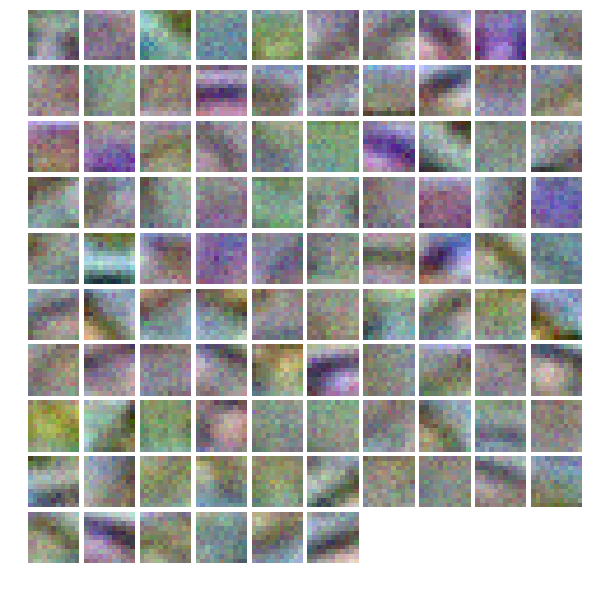

In [180]:
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

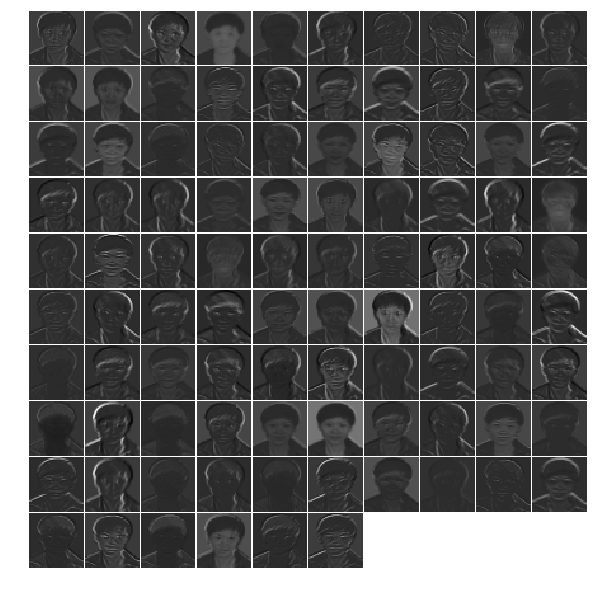

In [181]:
feat = net.blobs['conv1'].data[0, :97]
vis_square(feat)

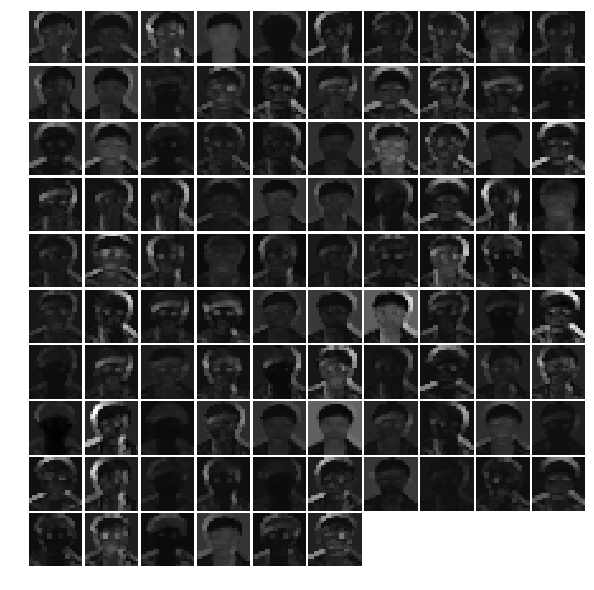

In [182]:
feat = net.blobs['pool1'].data[0]
vis_square(feat)

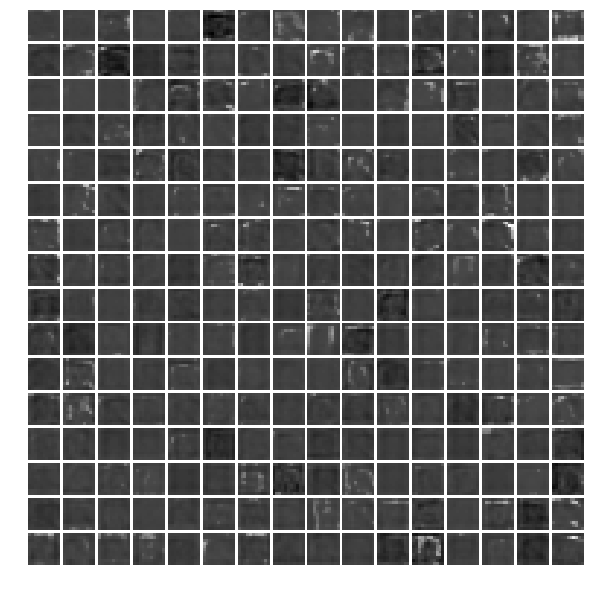

In [200]:
feat = net.blobs['conv2'].data[0]
vis_square(feat)

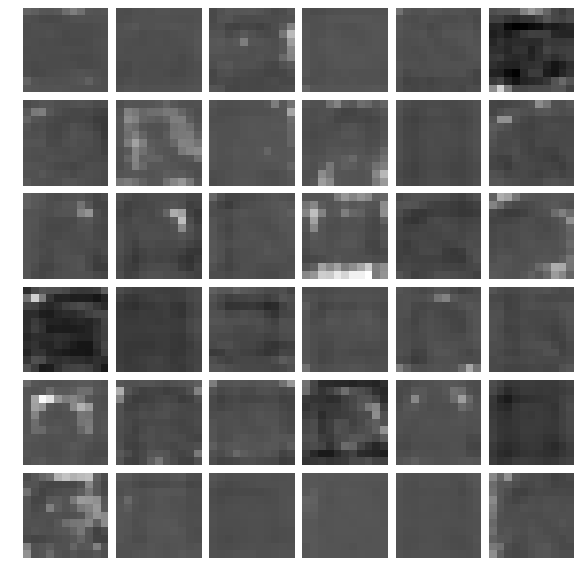

In [201]:
feat = net.blobs['conv2'].data[0, :36]
vis_square(feat)

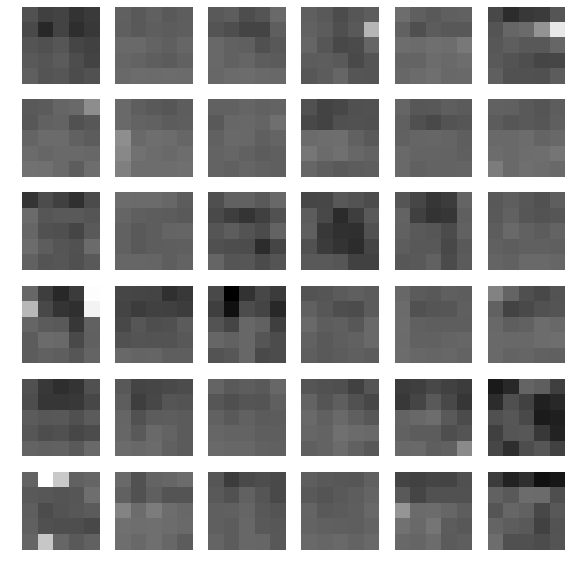

In [202]:
feat = net.blobs['conv3'].data[0, :36]
vis_square(feat)

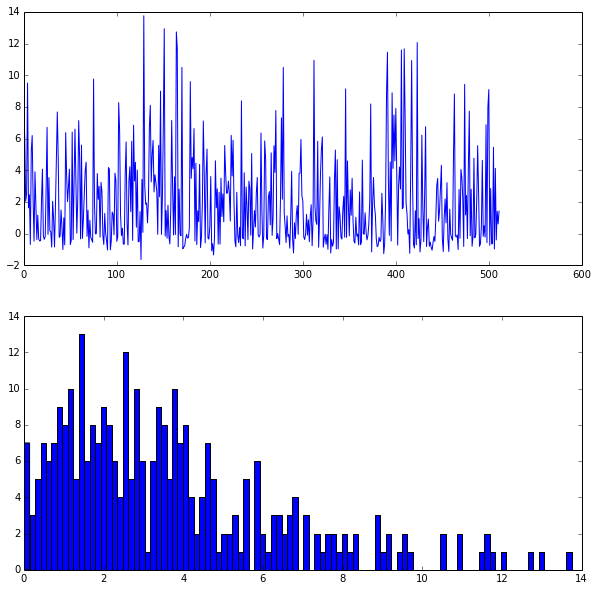

In [203]:
feat = net.blobs['fc4'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

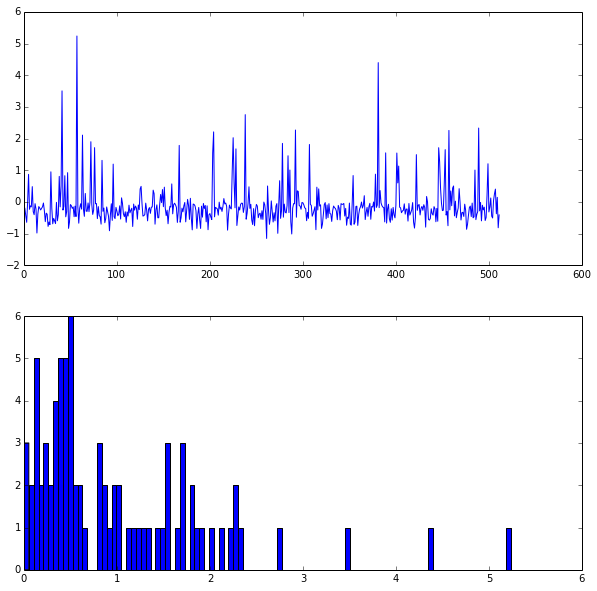

In [204]:
feat = net.blobs['fc5'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

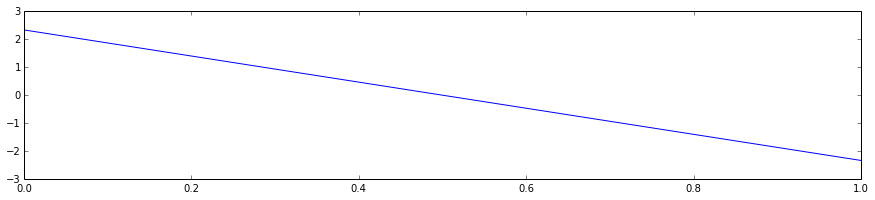

In [205]:
feat = net.blobs['fc6'].data[0]
plt.figure(figsize=(15, 3))
plt.plot(feat.flat)